## TFFMClassifier

In [1]:
import pandas as pd
import numpy as np
import scipy.sparse as sp
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time
from random import random
from sklearn import preprocessing
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import sensitivity_score
from imblearn.metrics import specificity_score
from tffm import TFFMClassifier
%matplotlib inline

In [5]:
# preprocessing
data = pd.read_csv('...\data_net.csv', sep = ';')
data.head()

,Click,Browsname,Searcher,TypeCon,Country,deviceType,Model,ModelCompany,NewID,Reversed,Type,System,FirstSearcher,Version,Sex,Age,TimeSpent,InternalCode,id_transf
0,0.0,Chrome,Google,wi-fi,ita,SmartPhone,Nokia 2240,Nokia,yes,no,mobile,Android,Yahoo,5.0,male,21,1.020,fergie,25465885
1,0.0,Firefox,Yahoo,cable,fra,SmartPhone,Meizu 4 pro,Meizu,yes,no,TV,Android,Yahoo,4.2,female,34,0.123,krag,65458971
2,0.0,Chrome,Yandex,wi-fi,rus,SmartPhone,Iphone 6,Iphone,yes,yes,mobile,Ios,Yahoo,9.0,male,53,0.140,leslie,21547895
3,0.0,IE,Google,cable,usa,SmartPhone,Iphone X,Iphone,no,no,web,Ios,Yahoo,9.0,male,30,0.010,fergie,32541568
4,0.0,IE,Google,wi-fi,usa,SmartPhone,Galaxy J4,SAMSUNG,no,no,TV,Android,Yahoo,5.5.1,female,15,1.100,frent,12023515


In [6]:
# features & labels
labels = data['Click']
features = data.drop('Click', axis = 1)

In [7]:
features.columns

Index(['Browsname', 'Searcher', 'TypeCon', 'Country', 'deviceType', 'Model',
       'ModelCompany', 'NewID', 'Reversed', 'Type', 'System', 'FirstSearcher',
       'Version', 'Sex', 'Age', 'TimeSpent', 'InternalCode', 'id_transf'],
      dtype='object')

In [8]:
# create the dictionary of unique attributes' lists
unique_attr = {}
for attr in features.columns:
    unique_attr[attr] = features[attr].unique().tolist()
unique_attr['Sex']

['male', 'female']

In [9]:
# features encoding
encoder = preprocessing.OneHotEncoder(categories=[unique_attr[i] for i in unique_attr], sparse = False, handle_unknown='ignore')
encoder

OneHotEncoder(categorical_features=None,
       categories=[['Chrome', 'Firefox', 'IE'], ['Google', 'Yahoo', 'Yandex'], ['wi-fi', 'cable'], ['ita', 'fra', 'rus', 'usa'], ['SmartPhone'], ['Nokia 2240', 'Meizu 4 pro', 'Iphone 6', 'Iphone X', 'Galaxy J4'], ['Nokia', 'Meizu', 'Iphone', 'SAMSUNG'], ['yes', 'no'], ['no', 'yes'], ['mobile', 'TV', 'web']...01, 1.1], ['fergie', 'krag', 'leslie', 'frent'], [25465885, 65458971, 21547895, 32541568, 12023515]],
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=False)

In [10]:
features['CONCAT'] = features.values.tolist()
features['CONCAT'].head()

0    [Chrome, Google, wi-fi, ita, SmartPhone, Nokia...
1    [Firefox, Yahoo, cable, fra, SmartPhone, Meizu...
2    [Chrome, Yandex, wi-fi, rus, SmartPhone, Iphon...
3    [IE, Google, cable, usa, SmartPhone, Iphone X,...
4    [IE, Google, wi-fi, usa, SmartPhone, Galaxy J4...
Name: CONCAT, dtype: object

In [27]:
t0 = time()
features['ENCODED'] = [encoder.fit_transform([i]).flatten() for i in features['CONCAT']]
print ("time on encoding:", round(time()-t0, 3), "s")

time on encoding: 35.49 s


In [28]:
# create the array with feature vectors
features_list = [list(i) for i in features['ENCODED']]
features_list_array = np.array(features_list)

In [30]:
# create the array with label vector 
labels_list_array = np.array(labels.tolist())

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features_list_array, labels_list_array, random_state=42, test_size=0.3)

In [37]:
# test on LogisticRegression & RandomForestClassifier & DecisionTreeClassifier
for model in [
                LogisticRegression(), 
                RandomForestClassifier(n_jobs=-1, n_estimators=200),
                tree.DecisionTreeClassifier()
            ]:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print('model: {}'.format(model.__str__()))
    print('Accuracy is ', accuracy_score(y_test, predictions)*100)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test,predictions))
    print('Sensivity score is ', sensitivity_score(y_test, predictions))
    print('Specificity_score is ', specificity_score(y_test, predictions))
    print()

C:\Users\maksim.parats\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
Accuracy is  93.13333333333334
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       1.00      0.06      0.11      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.97      0.53      0.54     15000
weighted avg       0.94      0.93      0.90     15000

[[13906     0]
 [ 1030    64]]
Sensivity score is  0.05850091407678245
Specificity_score is  1.0

model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
   

In [38]:
# Invert train/test datasets into sparse matrix
X_train_sparse = sp.csr_matrix(X_train)
X_test_sparse = sp.csr_matrix(X_test)

In [40]:
# Fitting parameters with input_type='sparse' 
for order in [2, 3]:
    for rank in [10,30,50]:
        model = TFFMClassifier(
        order=order, 
        rank=rank, 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
        n_epochs=50, 
        batch_size=1024,
        init_std=0.001,
        reg=0.01,
        input_type='sparse',
        seed=42)
        model.fit(X_train_sparse, y_train, show_progress=True)
        predictions = model.predict(X_test_sparse)
        print('[order={}] [rank={}] accuracy: {}'.format(order,rank, accuracy_score(y_test, predictions)))
        print('Accuracy is ', accuracy_score(y_test, predictions)*100)
        print(classification_report(y_test, predictions))
        print(confusion_matrix(y_test,predictions))
        print('Sensivity score is ', sensitivity_score(y_test, predictions))
        print('Specificity_score is ', specificity_score(y_test, predictions))
        print()

100%|██████████| 50/50 [00:16<00:00,  3.13epoch/s]


[order=2] [rank=10] accuracy: 0.9302666666666667
Accuracy is  93.02666666666667
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.84      0.05      0.10      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.89      0.53      0.53     15000
weighted avg       0.92      0.93      0.90     15000

[[13895    11]
 [ 1035    59]]
Sensivity score is  0.05393053016453382
Specificity_score is  0.9992089745433625



100%|██████████| 50/50 [00:39<00:00,  1.28epoch/s]


[order=2] [rank=30] accuracy: 0.9288
Accuracy is  92.88
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.62      0.06      0.11      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.78      0.53      0.54     15000
weighted avg       0.91      0.93      0.90     15000

[[13867    39]
 [ 1029    65]]
Sensivity score is  0.05941499085923217
Specificity_score is  0.9971954551991946



100%|██████████| 50/50 [00:09<00:00,  5.55epoch/s]


[order=2] [rank=50] accuracy: 0.9276
Accuracy is  92.75999999999999
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.53      0.07      0.12      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.73      0.53      0.54     15000
weighted avg       0.90      0.93      0.90     15000

[[13842    64]
 [ 1022    72]]
Sensivity score is  0.06581352833638025
Specificity_score is  0.9953976700704732



100%|██████████| 50/50 [00:29<00:00,  1.70epoch/s]


[order=3] [rank=10] accuracy: 0.9303333333333333
Accuracy is  93.03333333333333
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.80      0.06      0.11      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.87      0.53      0.54     15000
weighted avg       0.92      0.93      0.90     15000

[[13890    16]
 [ 1029    65]]
Sensivity score is  0.05941499085923217
Specificity_score is  0.9988494175176182



100%|██████████| 50/50 [01:16<00:00,  1.57s/epoch]


[order=3] [rank=30] accuracy: 0.9293333333333333
Accuracy is  92.93333333333334
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.64      0.07      0.13      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.79      0.53      0.55     15000
weighted avg       0.91      0.93      0.90     15000

[[13863    43]
 [ 1017    77]]
Sensivity score is  0.07038391224862889
Specificity_score is  0.9969078095785991



100%|██████████| 50/50 [00:17<00:00,  2.92epoch/s]


[order=3] [rank=50] accuracy: 0.9278666666666666
Accuracy is  92.78666666666666
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.54      0.07      0.13      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.74      0.53      0.54     15000
weighted avg       0.90      0.93      0.90     15000

[[13840    66]
 [ 1016    78]]
Sensivity score is  0.0712979890310786
Specificity_score is  0.9952538472601755



In [41]:
# Fitting parameters with input_type='dense' 
for order in [2, 3]:
    for rank in [10,30,50]:
        model = TFFMClassifier(
        order=order, 
        rank=rank, 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
        n_epochs=50, 
        batch_size=1024,
        init_std=0.001,
        reg=0.01,
        input_type='dense',
        seed=42)
        model.fit(X_train, y_train, show_progress=True)
        predictions = model.predict(X_test)
        print('[order={}] [rank={}] accuracy: {}'.format(order,rank, accuracy_score(y_test, predictions)))
        print('Accuracy is ', accuracy_score(y_test, predictions)*100)
        print(classification_report(y_test, predictions))
        print(confusion_matrix(y_test,predictions))
        print('Sensivity score is ', sensitivity_score(y_test, predictions))
        print('Specificity_score is ', specificity_score(y_test, predictions))
        print()

100%|██████████| 50/50 [00:20<00:00,  2.39epoch/s]


[order=2] [rank=10] accuracy: 0.9302666666666667
Accuracy is  93.02666666666667
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.84      0.05      0.10      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.89      0.53      0.53     15000
weighted avg       0.92      0.93      0.90     15000

[[13895    11]
 [ 1035    59]]
Sensivity score is  0.05393053016453382
Specificity_score is  0.9992089745433625



100%|██████████| 50/50 [00:23<00:00,  2.14epoch/s]


[order=2] [rank=30] accuracy: 0.9288
Accuracy is  92.88
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.62      0.06      0.11      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.78      0.53      0.54     15000
weighted avg       0.91      0.93      0.90     15000

[[13867    39]
 [ 1029    65]]
Sensivity score is  0.05941499085923217
Specificity_score is  0.9971954551991946



100%|██████████| 50/50 [00:26<00:00,  2.01epoch/s]


[order=2] [rank=50] accuracy: 0.9276
Accuracy is  92.75999999999999
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.53      0.07      0.12      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.73      0.53      0.54     15000
weighted avg       0.90      0.93      0.90     15000

[[13842    64]
 [ 1022    72]]
Sensivity score is  0.06581352833638025
Specificity_score is  0.9953976700704732



100%|██████████| 50/50 [00:48<00:00,  1.01s/epoch]


[order=3] [rank=10] accuracy: 0.9303333333333333
Accuracy is  93.03333333333333
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.80      0.06      0.11      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.87      0.53      0.54     15000
weighted avg       0.92      0.93      0.90     15000

[[13890    16]
 [ 1029    65]]
Sensivity score is  0.05941499085923217
Specificity_score is  0.9988494175176182



100%|██████████| 50/50 [00:55<00:00,  1.07s/epoch]


[order=3] [rank=30] accuracy: 0.9293333333333333
Accuracy is  92.93333333333334
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.64      0.07      0.13      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.79      0.53      0.55     15000
weighted avg       0.91      0.93      0.90     15000

[[13863    43]
 [ 1017    77]]
Sensivity score is  0.07038391224862889
Specificity_score is  0.9969078095785991



100%|██████████| 50/50 [00:59<00:00,  1.16s/epoch]


[order=3] [rank=50] accuracy: 0.9278666666666666
Accuracy is  92.78666666666666
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.54      0.07      0.13      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.74      0.53      0.54     15000
weighted avg       0.90      0.93      0.90     15000

[[13840    66]
 [ 1016    78]]
Sensivity score is  0.0712979890310786
Specificity_score is  0.9952538472601755



## Save/load model

In [ ]:
# internally model need to allocate memory before load previous weights,
# so need to set num_features explicitly
model.core.set_num_features(X_train.shape[1])
model.load_state('./tmp/state.tf')

## Optimizers

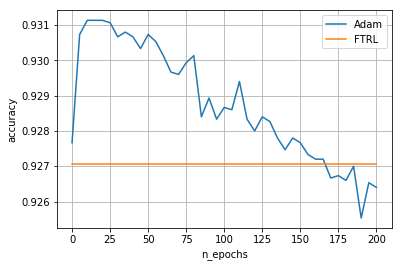

In [43]:
# there 2 optimizers will be used: AdamOptimizer and FtrlOptimizer
for optim, title in [(tf.train.AdamOptimizer(learning_rate=0.001), 'Adam'), 
              (tf.train.FtrlOptimizer(0.01, l1_regularization_strength=0.01), 'FTRL')]:
    acc = []
    model = TFFMClassifier(
        order=2, 
        rank=10, 
        optimizer=optim,
        batch_size=1024,
        init_std=0.001,
        reg=0.1,
        input_type='sparse',
    )
    n_epochs = 5
    anchor_epochs = range(0, 200+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(X_train_sparse, y_train, n_epochs=n_epochs)
        predictions = model.predict(X_test_sparse)
        acc.append(accuracy_score(y_test, predictions))
    plt.plot(anchor_epochs, acc, label=title)
    model.destroy()
plt.xlabel('n_epochs')
plt.ylabel('accuracy')
plt.legend()
plt.grid()

In [45]:
# CPU
model = TFFMClassifier(
    order=2,
    rank=10, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01), 
    n_epochs=100, 
    batch_size=-1,
    init_std=0.001,
    reg=0.001,
    input_type='sparse',
    session_config=tf.ConfigProto(log_device_placement=True, device_count = {'GPU': 0}),
    seed=42
)
print('CPU only / sparse data')
model.fit(X_train_sparse, y_train, show_progress=True)
predictions = model.predict(X_test_sparse)
print('accuracy: {}'.format(accuracy_score(y_test, predictions)))
model.destroy()

CPU only / sparse data


100%|██████████| 100/100 [00:30<00:00,  3.28epoch/s]


accuracy: 0.9303333333333333


In [46]:
# GPU
model = TFFMClassifier(
    order=2,
    rank=10, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.01), 
    n_epochs=100, 
    batch_size=-1,
    init_std=0.001,
    reg=0.001,
    input_type='sparse',
    session_config=tf.ConfigProto(log_device_placement=True),
    seed=42
)
print('GPU / sparse data')
model.fit(X_train_sparse, y_train, show_progress=True)
predictions = model.predict(X_test_sparse)
print('accuracy: {}'.format(accuracy_score(y_test, predictions)))
model.destroy()

GPU / sparse data


100%|██████████| 100/100 [00:30<00:00,  3.30epoch/s]


accuracy: 0.9303333333333333


## Weighted Loss Function

In [47]:
print('Classes balance: {:.03f} / {:.03f}'.format(np.mean(labels_list_array==0), 
                                                  np.mean(labels_list_array==1)))

Classes balance: 0.926 / 0.074


In [48]:
np.mean(labels_list_array==1)

0.07378

In [50]:
# sample_weight='balanced'
order = 2
model = TFFMClassifier(
    order=order,
    sample_weight='balanced',
    rank=10, 
    optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
    n_epochs=50, 
    batch_size=1024,
    init_std=0.001,
    reg=0.01,
    input_type='sparse',
    seed=42
)
model.fit(X_train_sparse, y_train, show_progress=True)
predictions = model.predict(X_test_sparse)
print('[order={}] [rank={}] accuracy: {}'.format(order,rank, accuracy_score(y_test, predictions)))
print('Accuracy is ', accuracy_score(y_test, predictions)*100)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test,predictions))
print('Sensivity score is ', sensitivity_score(y_test, predictions))
print('Specificity_score is ', specificity_score(y_test, predictions))
model.destroy()

100%|██████████| 50/50 [00:16<00:00,  3.18epoch/s]


[order=2] [rank=50] accuracy: 0.6616666666666666
Accuracy is  66.16666666666666
              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78     13906
         1.0       0.16      0.87      0.27      1094

   micro avg       0.66      0.66      0.66     15000
   macro avg       0.57      0.76      0.53     15000
weighted avg       0.92      0.66      0.74     15000

[[8978 4928]
 [ 147  947]]
Sensivity score is  0.8656307129798904
Specificity_score is  0.6456205954264347


In [51]:
# weight - optional
pos_class_weight = list(map(float,range(1, 5)))
for weight in pos_class_weight:
    order = 2
    model = TFFMClassifier(
        order=order,
        pos_class_weight=weight,
        rank=10, 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.001), 
        n_epochs=40, 
        batch_size=1024,
        init_std=0.001,
        reg=0.01,
        input_type='sparse',
        seed=42
    )
    model.fit(X_train_sparse, y_train, show_progress=True)
    predictions = model.predict(X_test_sparse)
    print('[order={}] [rank={}] accuracy: {}'.format(order,rank, accuracy_score(y_test, predictions)))
    print('Accuracy is ', accuracy_score(y_test, predictions)*100)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test,predictions))
    print('Sensivity score is ', sensitivity_score(y_test, predictions))
    print('Specificity_score is ', specificity_score(y_test, predictions))
    model.destroy()

100%|██████████| 40/40 [00:12<00:00,  3.16epoch/s]


[order=2] [rank=50] accuracy: 0.9305333333333333
Accuracy is  93.05333333333333
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     13906
         1.0       0.91      0.05      0.10      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.92      0.53      0.53     15000
weighted avg       0.93      0.93      0.90     15000

[[13900     6]
 [ 1036    58]]
Sensivity score is  0.05301645338208409
Specificity_score is  0.9995685315691069


100%|██████████| 40/40 [00:13<00:00,  3.08epoch/s]


[order=2] [rank=50] accuracy: 0.927
Accuracy is  92.7
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     13906
         1.0       0.50      0.07      0.13      1094

   micro avg       0.93      0.93      0.93     15000
   macro avg       0.71      0.53      0.55     15000
weighted avg       0.90      0.93      0.90     15000

[[13824    82]
 [ 1013    81]]
Sensivity score is  0.0740402193784278
Specificity_score is  0.9941032647777938


100%|██████████| 40/40 [00:13<00:00,  3.16epoch/s]


[order=2] [rank=50] accuracy: 0.9197333333333333
Accuracy is  91.97333333333333
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.96     13906
         1.0       0.35      0.12      0.17      1094

   micro avg       0.92      0.92      0.92     15000
   macro avg       0.64      0.55      0.57     15000
weighted avg       0.89      0.92      0.90     15000

[[13669   237]
 [  967   127]]
Sensivity score is  0.11608775137111517
Specificity_score is  0.9829569969797209


100%|██████████| 40/40 [00:12<00:00,  3.17epoch/s]


[order=2] [rank=50] accuracy: 0.9002
Accuracy is  90.02
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95     13906
         1.0       0.26      0.21      0.23      1094

   micro avg       0.90      0.90      0.90     15000
   macro avg       0.60      0.58      0.59     15000
weighted avg       0.89      0.90      0.89     15000

[[13277   629]
 [  868   226]]
Sensivity score is  0.20658135283363802
Specificity_score is  0.9547677261613692


## Different regularization strategies

Instructions for updating:
keep_dims is deprecated, use keepdims instead


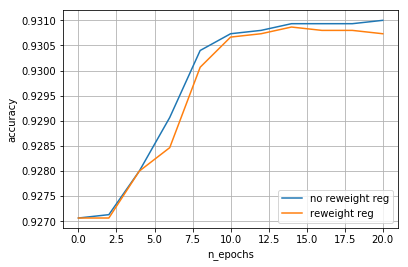

In [52]:
for use_reweight, title in [(False, 'no reweight reg'), (True, 'reweight reg')]:
    acc = []
    model = TFFMClassifier(
        order=2, 
        rank=10, 
        optimizer=tf.train.AdamOptimizer(learning_rate=0.001),
        batch_size=1024,
        init_std=0.001,
        reg=1.0,
        input_type='sparse',
        reweight_reg = use_reweight
    )
    n_epochs = 2
    anchor_epochs = range(0, 20+1, n_epochs)
    for _ in anchor_epochs:
        # score result every 5 epochs
        model.fit(X_train_sparse, y_train, n_epochs=n_epochs)
        predictions = model.predict(X_test_sparse)
        acc.append(accuracy_score(y_test, predictions))
    plt.plot(anchor_epochs, acc, label=title)
    model.destroy()
plt.xlabel('n_epochs')
plt.ylabel('accuracy')
plt.legend(loc=4)
plt.grid()

Parameters
    ----------
    order : int, default: 2
        Order of corresponding polynomial model.
        All interaction from bias and linear to order will be included.
    rank : int, default: 5
        Number of factors in low-rank appoximation.
        This value is shared across different orders of interaction.
    input_type : str, 'dense' or 'sparse', default: 'dense'
        Type of input data. Only numpy.array allowed for 'dense' and
        scipy.sparse.csr_matrix for 'sparse'. This affects construction of
        computational graph and cannot be changed during training/testing.
    loss_function : function: (tf.Op, tf.Op) -> tf.Op, default: None
        Loss function.
        Take 2 tf.Ops: outputs and targets and should return tf.Op of loss
        See examples: .utils.loss_mse, .utils.loss_logistic
    optimizer : tf.train.Optimizer, default: AdamOptimizer(learning_rate=0.01)
        Optimization method used for training
    reg : float, default: 0
        Strength of L2 regularization
    use_diag : bool, default: False
        Use diagonal elements of weights matrix or not.
        In the other words, should terms like x^2 be included.
        Ofter reffered as a "Polynomial Network".
        Default value (False) corresponds to FM.
    reweight_reg : bool, default: False
        Use frequency of features as weights for regularization or not.
        Should be usefull for very sparse data and/or small batches
    init_std : float, default: 0.01
        Amplitude of random initialization
    seed : int or None, default: None
        Random seed used at graph creating time